##Punto 3: Arboles de Decisión - Bryan Rodríguez

In [2]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
#Cargue dataset y análisis 
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Cantidad de registros/Filas
data.shape

(1599, 12)

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#Revisión datos Null
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

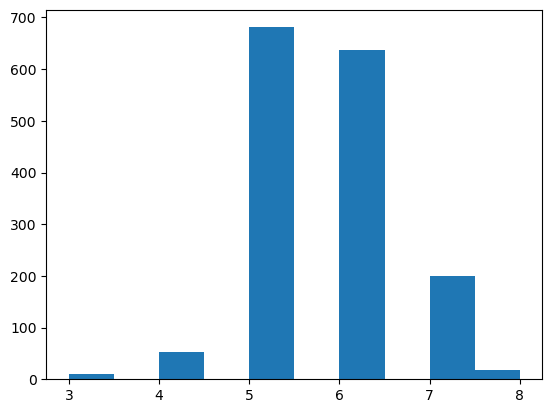

In [7]:
plt.hist(data.quality)

<Axes: xlabel='fixed acidity', ylabel='pH'>

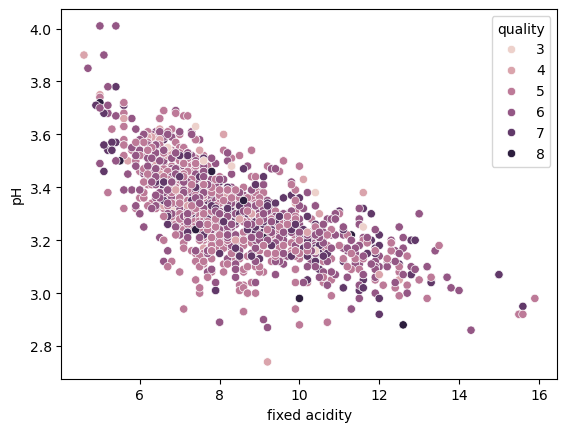

In [8]:
sns.scatterplot(x = "fixed acidity", y = "pH", hue = "quality", data = data)

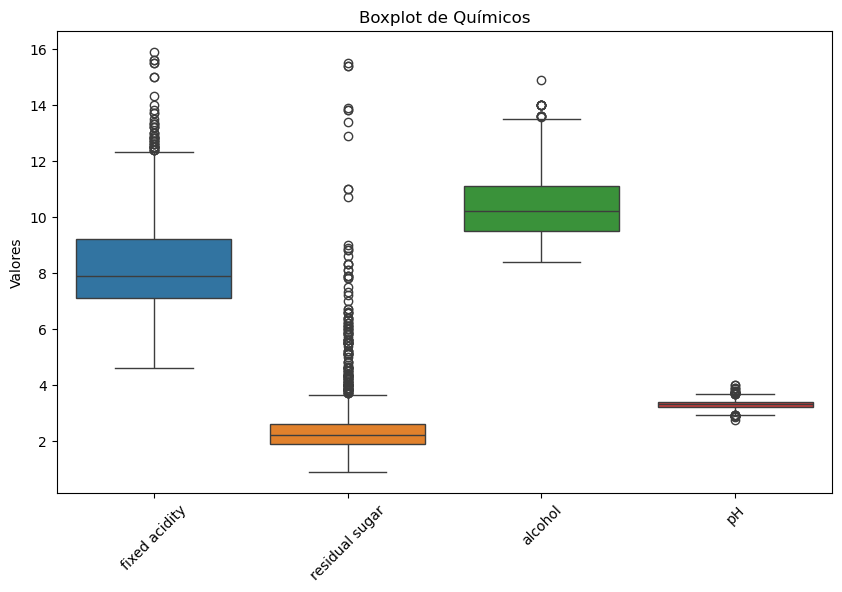

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['fixed acidity', 'residual sugar', 'alcohol', 'pH']])
plt.xticks(rotation=45)
plt.title('Boxplot de Químicos')
plt.ylabel('Valores')
plt.show()

In [10]:
predictors_col = ["fixed acidity", "residual sugar", "alcohol", "pH"]
target_col = ['quality']

In [11]:
predictors = data[predictors_col]
target = data[target_col]

In [12]:
predictors

,fixed acidity,residual sugar,alcohol,pH
0,7.4,1.9,9.4,3.51
1,7.8,2.6,9.8,3.20
2,7.8,2.3,9.8,3.26
3,11.2,1.9,9.8,3.16
4,7.4,1.9,9.4,3.51
...,...,...,...,...
1594,6.2,2.0,10.5,3.45
1595,5.9,2.2,11.2,3.52
1596,6.3,2.3,11.0,3.42
1597,5.9,2.0,10.2,3.57


In [13]:
target


,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [14]:
corr = predictors.corr()
corr

,fixed acidity,residual sugar,alcohol,pH
fixed acidity,1.000000,0.114777,-0.061668,-0.682978
residual sugar,0.114777,1.000000,0.042075,-0.085652
alcohol,-0.061668,0.042075,1.000000,0.205633
pH,-0.682978,-0.085652,0.205633,1.000000


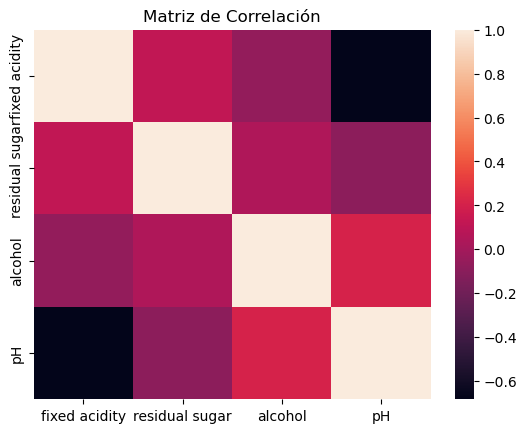

In [15]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [17]:
tree = DecisionTreeClassifier()

In [18]:
arbol = tree.fit(X_train, y_train)

In [ ]:
plot_tree(arbol)

[Text(0.5901098203419441, 0.9782608695652174, 'x[2] <= 10.525\ngini = 0.646\nsamples = 1279\nvalue = [9.0, 45.0, 535.0, 514.0, 164.0, 12.0]'),
 Text(0.37768830725895103, 0.9347826086956522, 'x[0] <= 9.95\ngini = 0.546\nsamples = 774\nvalue = [6, 29, 450, 260, 29, 0]'),
 Text(0.48389906380044756, 0.9565217391304348, 'True  '),
 Text(0.27924596125157036, 0.8913043478260869, 'x[2] <= 9.925\ngini = 0.513\nsamples = 652\nvalue = [4.0, 24.0, 409.0, 197.0, 18.0, 0.0]'),
 Text(0.17987029875942212, 0.8478260869565217, 'x[0] <= 9.15\ngini = 0.45\nsamples = 467\nvalue = [2, 16, 324, 121, 4, 0]'),
 Text(0.07205215530778894, 0.8043478260869565, 'x[2] <= 9.075\ngini = 0.472\nsamples = 424\nvalue = [2.0, 15.0, 283.0, 121.0, 3.0, 0.0]'),
 Text(0.02512562814070352, 0.7608695652173914, 'x[3] <= 3.375\ngini = 0.529\nsamples = 23\nvalue = [0, 2, 7, 14, 0, 0]'),
 Text(0.016331658291457288, 0.717391304347826, 'x[3] <= 3.19\ngini = 0.32\nsamples = 15\nvalue = [0, 0, 3, 12, 0, 0]'),
 Text(0.013819095477386936

In [ ]:
predicciones = arbol.predict(X_test)

In [ ]:
predicciones

In [ ]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

In [ ]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

In [ ]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

In [ ]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

In [ ]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1